In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

import zipfile

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmaod 600 ~/.kaggle/kaggle.json

! kaggle datasets download imetomi/eur-usd-forex-pair-historical-data-2002-2019 

with zipfile.ZipFile("/content/eur-usd-forex-pair-historical-data-2002-2019.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

df = pd.read_csv('eurusd_minute.csv',index_col=0,parse_dates=True)
#rimuovo la colonna dell'ora
df.drop('Time', inplace=True, axis=1) #mi dava problemi con il "pipe.fit"

import datetime

start_train = datetime.datetime(2005, 1, 1,0,0)
end_train = datetime.datetime(2015, 12, 31, 0, 0)
start_test = datetime.datetime(2016, 1, 1,0,0)
end_test = datetime.datetime(2020, 4, 29, 0, 0)

#Prendiamo i dati necessari per il training
df_train=df.loc[start_train:end_train]
X_train=df_train.drop("BC", axis=1).values
Y_train=df_train["BC"].values

#Prendiamo i dati necessari per il testing

df_test=df.loc[start_test:end_test]
X_test=df_test.drop("BC", axis=1).values
Y_test=df_test["BC"].values

/bin/bash: chmaod: command not found
 84% 97.0M/116M [00:01<00:00, 84.2MB/s]
100% 116M/116M [00:01<00:00, 88.7MB/s] 


In [ ]:
pipe=make_pipeline(StandardScaler(), Ridge(alpha=0.01))
pipe.fit(X_train,Y_train)

#Facciamo la nostra predizione sui dati di testing
Y_pred = pipe.predict(X_test)

errore = mean_squared_error(Y_test, Y_pred)
print("Errore:", errore)

punteggio = r2_score(Y_test, Y_pred)
print("Score:", punteggio)

Errore: 4.363099423746395e-12
Score: 0.9999999977522678


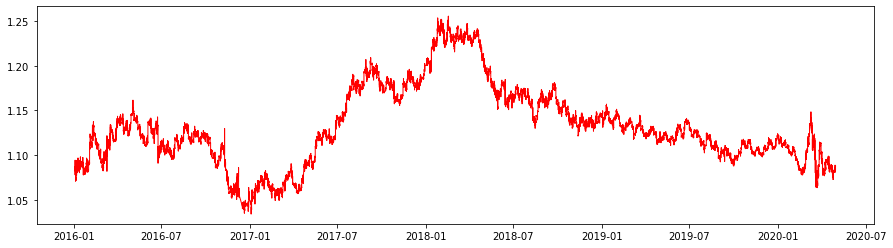

In [ ]:
f = plt.figure()
f.set_figwidth(15)
#plt.plot(df_test.index,Y_test,color='green',linewidth=3)
plt.plot(df_test.index,Y_pred,color='red',linewidth=1)
plt.show()